# Dataset Loading

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
squad_v2 = False
model_checkpoint = "distilbert-base-uncased"
batch_size = 16

In [ ]:
from datasets import load_dataset, load_metric

In [ ]:
datasets = load_dataset("squad_v2" if squad_v2 else "squad")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Dataset squad downloaded and prepared to /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

In [ ]:
datasets["train"][0]

{'id': '5733be284776f41900661182',
 'title': 'University_of_Notre_Dame',
 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?',
 'answers': {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}}

In [ ]:
datasets["validation"][0]

{'id': '56be4db0acb8001400a502ec',
 'title': 'Super_Bowl_50',
 'context': 'Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi\'s Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.',
 'question': 'Which NFL team represented the AFC at Super Bowl 50?',
 'answers': {'text': ['Denver Broncos', 'Denver Broncos', 'Denver Broncos'],


# Data Pre-processing

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame.from_dict(datasets["train"])
#trimming the dataframe due to lack of computer power
df_trimmed=df[:12000]

In [ ]:
pip install nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words=stopwords.words('english')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [ ]:
#defining function for Stopwords removal and Lemmatization
def stopwords_removal(column_name):
  counter = 0
  temp_arr = []
  for i in range(0, len(df_trimmed)):
      counter += 1
      if column_name == "pre-processed_context":
        doc = df_trimmed['context'][i]
        temp_arr.append(" ".join( token for token in nltk.word_tokenize(doc) if not token in stop_words))
      else:
        doc = df_trimmed['question'][i]
        temp_arr.append(" ".join(token for token in nltk.word_tokenize(doc) if not token in stop_words))
     
  df_trimmed[column_name] = temp_arr
def lemmatization(column_name):
  counter = 0
  for i in range(0, len(df_trimmed)):
      counter += 1
      doc = df_trimmed[column_name][i]
      df_trimmed[column_name].replace(df_trimmed[column_name][i], " ".join(lemmatizer.lemmatize(token) for token in nltk.word_tokenize(doc)), inplace = True)
      


In [ ]:
stopwords_removal('pre-processed_context')


<ipython-input-17-27ada1f1b21e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed[column_name] = temp_arr


In [ ]:
df_trimmed['pre-processed_context'][0]

"Architecturally , school Catholic character . Atop Main Building 's gold dome golden statue Virgin Mary . Immediately front Main Building facing , copper statue Christ arms upraised legend `` Venite Ad Me Omnes '' . Next Main Building Basilica Sacred Heart . Immediately behind basilica Grotto , Marian place prayer reflection . It replica grotto Lourdes , France Virgin Mary reputedly appeared Saint Bernadette Soubirous 1858 . At end main drive ( direct line connects 3 statues Gold Dome ) , simple , modern stone statue Mary ."

In [ ]:
lemmatization('pre-processed_context')

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_trimmed['pre-processed_context'][0]

"Architecturally , school Catholic character . Atop Main Building 's gold dome golden statue Virgin Mary . Immediately front Main Building facing , copper statue Christ arm upraised legend `` Venite Ad Me Omnes `` . Next Main Building Basilica Sacred Heart . Immediately behind basilica Grotto , Marian place prayer reflection . It replica grotto Lourdes , France Virgin Mary reputedly appeared Saint Bernadette Soubirous 1858 . At end main drive ( direct line connects 3 statue Gold Dome ) , simple , modern stone statue Mary ."

In [ ]:
stopwords_removal('pre-processed_questions')
lemmatization('pre-processed_questions')

<ipython-input-17-27ada1f1b21e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed[column_name] = temp_arr


In [ ]:
df_trimmed['pre-processed_questions'][0]

'To Virgin Mary allegedly appear 1858 Lourdes France ?'

# Document Clustering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
import sklearn.metrics as metrics
import sklearn.cluster as cluster
import matplotlib.pyplot as plt

In [ ]:
# initialize the vectorizer
vectorizer = TfidfVectorizer()
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_trimmed['pre-processed_context'])

In [ ]:
#Silhouette Method for finding optimum Value of K
SK = range(2,20)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X).labels_
    score = metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print (" score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

 score for k(clusters) = 2 is 0.005031716588662284
 score for k(clusters) = 3 is 0.00651609469958853
 score for k(clusters) = 4 is 0.008059565865316485
 score for k(clusters) = 5 is 0.010164429679087286
 score for k(clusters) = 6 is 0.012425186580892778
 score for k(clusters) = 7 is 0.01360985909015622
 score for k(clusters) = 8 is 0.014692483602464756
 score for k(clusters) = 9 is 0.016158360491877344
 score for k(clusters) = 10 is 0.018104321723118842
 score for k(clusters) = 11 is 0.019189371292769878
 score for k(clusters) = 12 is 0.020123436062988602
 score for k(clusters) = 13 is 0.021860213963643193
 score for k(clusters) = 14 is 0.022981333855289953
 score for k(clusters) = 15 is 0.023950715987138712
 score for k(clusters) = 16 is 0.025407196128849813
 score for k(clusters) = 17 is 0.02404055233425296
 score for k(clusters) = 18 is 0.02581191074412498
 score for k(clusters) = 19 is 0.029203094102815377


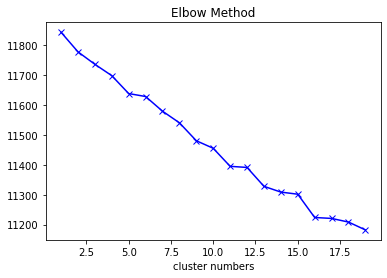

In [ ]:
# Elbow method using MiniBatch K-means for finding optimum value of K
K = range(1,20)
SSE = []
for k in K:
    kmeans = MiniBatchKMeans(n_clusters = k)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(K,SSE,'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

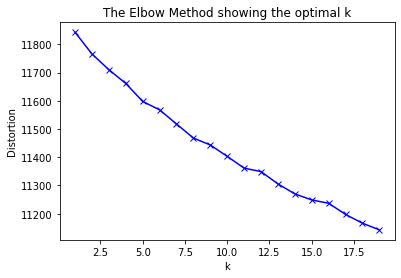

In [ ]:
# Elbow method using K-means for finding optimum value of K
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# training K-means with 16 clusters
kmeans = KMeans(n_clusters=16, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [ ]:
len(clusters)

12000

In [ ]:
# assign clusters and pca vectors to our dataframe 
df_trimmed['clusters'] = clusters


<ipython-input-28-e9773fd6dfea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['clusters'] = clusters


In [ ]:
#evaluating K-Means clustering
counter = 0
for i, cluster in enumerate(df_trimmed['clusters']):
  X_new_tfidf = vectorizer.transform([df_trimmed['pre-processed_questions'][i]])
  y = kmeans.predict(X_new_tfidf)
  #print(y[0])
  #print(y)
  if y[0] == cluster:
    counter += 1
print(counter)

7326


In [ ]:
df_trimmed['clusters'].value_counts()

10    3532
0     1748
6      731
3      721
11     676
5      662
12     558
13     556
2      529
15     445
8      410
9      370
14     362
1      299
7      206
4      195
Name: clusters, dtype: int64

In [ ]:
df_trimmed.head()

,id,title,context,question,answers,processed_content,pre-processed_content,pre-processed_context,pre-processed_questions,clusters
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ...","Architecturally , school Catholic character . ...","Architecturally , school Catholic character . ...","Architecturally , school Catholic character . ...",To Virgin Mary allegedly appear 1858 Lourdes F...,10
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe...","Architecturally , school Catholic character . ...","Architecturally , school Catholic character . ...","Architecturally , school Catholic character . ...",What front Notre Dame Main Building ?,10
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'...","Architecturally , school Catholic character . ...","Architecturally , school Catholic character . ...","Architecturally , school Catholic character . ...",The Basilica Sacred heart Notre Dame beside st...,10
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...,"Architecturally , school Catholic character . ...","Architecturally , school Catholic character . ...","Architecturally , school Catholic character . ...",What Grotto Notre Dame ?,10
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...,"Architecturally , school Catholic character . ...","Architecturally , school Catholic character . ...","Architecturally , school Catholic character . ...",What sits top Main Building Notre Dame ?,10


# Question Classification

In [ ]:
X, y = df_trimmed['pre-processed_questions'], df_trimmed['clusters']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
print(f'Train dimensions: {X_train.shape, y_train.shape}')
print(f'Test dimensions: {X_test.shape, y_test.shape}')
# Check out target distribution
print(y_train.value_counts())
print(y_test.value_counts())


Train dimensions: ((9600, 8854), (9600,))
Test dimensions: ((2400, 8854), (2400,))
10    2820
0     1396
6      588
11     560
3      554
5      528
12     452
13     440
2      423
15     350
8      339
9      309
14     289
1      240
7      163
4      149
Name: clusters, dtype: int64
10    712
0     352
3     167
6     143
5     134
11    116
13    116
12    106
2     106
15     95
14     73
8      71
9      61
1      59
4      46
7      43
Name: clusters, dtype: int64


In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#XGBOOST Classifier
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

print(type(xgb_cl))

<class 'xgboost.sklearn.XGBClassifier'>


In [ ]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred = xgb_cl.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 24   0   0   0   0   0   0  12   1   0   0   0   0   0   0   0   0]
 [  0   7   0   0   0   0   0  13  18   0   1   0   0   0   0   0   0]
 [  0   0  49   0   0   0   0  10   0   0   0   0   0   0   0   0   0]
 [  0   0   0  67   0   1   0   3   0   0   0   0   0   0   0   0   0]
 [  1   0   0   2  58   3   0  26   1   0   0   0   0   0   0   0   1]
 [  0   0   0   5  17  25   2  18   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0 100  20   0   0   0   0   0   1   0   0   0]
 [  1   0   0   5   0   0  13 326   9   4   0   3   1   1   1   4   1]
 [  0   2   0   0   0   0   0  30  61   0   0   0   0   0   0   0   0]
 [  1   0   0   1   1   0   0  18   1  49   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  13   0   0  36   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   7   0   0   0  62   0   0  15   0   0]
 [  0   0   0   0   0   0   0  16   1   0   0   0  35   0   0   0   2]
 [  0   0   0   1   0   0   0  74   0   0   0   0   0  65   0   0   1]
 [  0 

In [ ]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[671  21   0  10  13   0   1   3   5   9   3   4   0  16   0   2   1   6]
 [ 44  95   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0]
 [  9   0  64   0   0   0   0  14   0   0   0   0   0   1   0   0   0   0]
 [ 22   0   0  86   0   0   0   2   6   0   0   0   0   1   0   0   0   0]
 [ 78   1   0   2 176   1   0   1   0   1   1   0   0   3   0   0   0   5]
 [  8   0   0   0   1  26   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 17   0   0   0   0   0  40   0   0   0   0   0   0   0   0   0   0   0]
 [  6   0  12   3   1   0   0  50   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   3   1   0   0   0  68   0   0   0   0   0   0   0   0   0]
 [ 40   0   0   1   1   0   0   0   0 108   0   0   0   0   0   0   0   1]
 [ 12   0   0   0   0   0   0   0   0   0 119   0   0   0   0   0   0   1]
 [ 15   0   0   0   0   0   0   0   0   0   0  66   0   0   0   0   1   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0  53   0   0   0   0   0]
 [ 25   1   0   6   1   0

In [ ]:
# SVM Classifier-Final Model
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[231   0   3   6   0   0   2   1   1   0 103   0   5   0   0   0]
 [  3  40   0   1   0   0   0   0   0   0  15   0   0   0   0   0]
 [  2   0  45   0   0   0   1   1   0   0  50   0   0   7   0   0]
 [  6   0   0 121   0   0   0   0   0   0  39   1   0   0   0   0]
 [  0   0   0   0  24   0   0   0   0   0   7   3  12   0   0   0]
 [  0   0   0   0   0 120   0   0   0   0  14   0   0   0   0   0]
 [  7   0   1   0   0   0 110   0   0   0  25   0   0   0   0   0]
 [  6   0   0   0   0   0   0  23   0   0  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  66   0   5   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0  50  10   0   0   0   0   0]
 [ 18   0   2  10   0   3   3   3   2   0 648   2   6   9   4   2]
 [  2   0   0   0   0   0   0   0   0   0  28  86   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0  17   0  87   0   0   0]
 [  3   0   1   0   0   0   0   0   0   0  29   3   0  79   0   1]
 [  2   0   0   0   0   0   0   0   0   0  17   0   0   0  54 

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.324 total time=  13.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.327 total time=  13.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.324 total time=  13.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.328 total time=  13.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.325 total time=  13.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.294 total time=   9.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.294 total time=  10.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.294 total time=  10.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.294 total time=  11.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.295 total time=  10.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.294 total time=   8.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


In [ ]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       352
           1       0.98      0.80      0.88        59
           2       0.78      0.59      0.67       106
           3       0.86      0.89      0.87       167
           4       0.83      0.76      0.80        46
           5       0.98      0.93      0.96       134
           6       0.91      0.87      0.89       143
           7       0.81      0.70      0.75        43
           8       0.92      0.97      0.95        71
           9       1.00      0.85      0.92        61
          10       0.75      0.84      0.79       712
          11       0.89      0.82      0.85       116
          12       0.84      0.87      0.86       106
          13       0.82      0.77      0.79       116
          14       0.88      0.84      0.86        73
          15       0.92      0.69      0.79        95

    accuracy                           0.82      2400
   macro avg       0.87   

# Top ranked document retrieval

In [ ]:
#Normalized Term Frequency
def termFrequency(term, content):
    normalizecontent = content.lower().split()
    return normalizecontent.count(term.lower()) / float(len(normalizecontent))

def compute_normalizedtf(contents):
    tf_doc = []
    for txt in contents:
        sentence = txt.split()
        norm_tf= dict.fromkeys(set(sentence), 0)
        for word in sentence:
            norm_tf[word] = termFrequency(word, txt)
        tf_doc.append(norm_tf)
        df_ntf = pd.DataFrame([norm_tf])
        idx = 0
        new_col = ["Normalized TF"]    
        df_ntf.insert(loc=idx, column='Document', value=new_col)
    return tf_doc

In [ ]:
def inverseDocumentFrequency(term, allcontents):
    numDocumentsWithThisTerm = 0
    for doc in range (0, len(allcontents)):
        if term.lower() in allcontents[doc].lower().split():
            numDocumentsWithThisTerm = numDocumentsWithThisTerm + 1
 
    if numDocumentsWithThisTerm > 0:
        return 1.0 + math.log(float(len(allcontents)) / numDocumentsWithThisTerm)
    else:
        return 1.0
    
def compute_idf(contents):
    idf_dict = {}
    for doc in contents:
        sentence = doc.split()
        for word in sentence:
            idf_dict[word] = inverseDocumentFrequency(word, contents)
    return idf_dict

In [ ]:
def compute_tfidf_with_alldocs(contents , query, cluster, input_dft):
    tf_idft = []
    index = 0
    idft_dict = compute_idf(input_dft['pre-processed_context'][input_dft['clusters'] == cluster].unique())
    query_tokens = query.split()
    tf_doc = compute_normalizedtf(input_dft['pre-processed_context'][input_dft['clusters'] == cluster].unique())
    dft = pd.DataFrame(columns=['doc'] + query_tokens)
    dft['context'] = np.arange(0 , len(contents))
    for doc in contents:
        dft['doc'] = np.arange(0 , len(contents))
        dft['context'][index] = doc
        doc_num = tf_doc[index]
        sentence = doc.split()
        for word in sentence:
            for text in query_tokens:
                if(text == word):
                    idx = sentence.index(word)
                    tf_idft_score = doc_num[word] * idft_dict[word]
                    tf_idft.append(tf_idft_score)
                    dft.iloc[index, dft.columns.get_loc(word)] = tf_idft_score
        index += 1
    dft.fillna(0 , axis=1, inplace=True)
    return tf_idft , dft

In [ ]:
df_trimmed.head()

,id,title,context,question,answers,pre-processed_context,pre-processed_questions,clusters
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ...","Architecturally , school Catholic character . ...",To Virgin Mary allegedly appear 1858 Lourdes F...,10
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe...","Architecturally , school Catholic character . ...",What front Notre Dame Main Building ?,10
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'...","Architecturally , school Catholic character . ...",The Basilica Sacred heart Notre Dame beside st...,10
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...,"Architecturally , school Catholic character . ...",What Grotto Notre Dame ?,10
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...,"Architecturally , school Catholic character . ...",What sits top Main Building Notre Dame ?,10


In [ ]:
tf_idf_df = df_trimmed.sample(n = 500)
tf_idf_df.reset_index()

,index,id,title,context,question,answers,pre-processed_context,pre-processed_questions,clusters
0,5080,56cfbc7f234ae51400d9bf35,Solar_energy,Geography effects solar energy potential becau...,Why does time have an effect of the amount of ...,{'text': ['during the nighttime there is littl...,Geography effect solar energy potential area c...,Why time effect amount available solar energy ?,10
1,4966,56d074ff234ae51400d9c2ee,Solar_energy,Commercial CSP plants were first developed in ...,What is the largest solar power plant in the w...,"{'text': ['354 MW SEGS CSP'], 'answer_start': ...",Commercial CSP plant first developed 1980s . S...,What largest solar power plant world ?,10
2,11043,56de43294396321400ee2736,Human_Development_Index,Some countries were not included for various r...,What is the main reason that countries were ex...,{'text': ['unavailability of certain crucial d...,"Some country included various reason , mainly ...",What main reason country excluded 2011 report ?,0
3,7155,56d3721359d6e414001463e1,American_Idol,"Following the success of season one, the secon...",What year did season two of American Idol firs...,"{'text': ['2003'], 'answer_start': [86]}","Following success season one , second season m...",What year season two American Idol first air ?,12
4,4085,56cf2b33aab44d1400b88daf,New_York_City,"Winters are cold and damp, and prevailing wind...",What mountains serve as a barrier to keep New ...,"{'text': ['Appalachians'], 'answer_start': [196]}","Winters cold damp , prevailing wind pattern bl...",What mountain serve barrier keep New York City...,10
...,...,...,...,...,...,...,...,...,...
495,2999,56d135e0e7d4791d00902016,The_Legend_of_Zelda:_Twilight_Princess,Twilight Princess received the awards for Best...,What award did Game Critics Awards and GameSpy...,"{'text': ['Best Console Game'], 'answer_start'...",Twilight Princess received award Best Artistic...,What award Game Critics Awards GameSpy give Tw...,14
496,7484,56db2eaae7c41114004b4ef0,American_Idol,"The thirteenth season premiered on January 15,...",Who was the mentor this season?,"{'text': ['Randy Jackson'], 'answer_start': [91]}","The thirteenth season premiered January 15 , 2...",Who mentor season ?,12
497,6172,56d11c7317492d1400aab9b3,Kanye_West,"On March 30, 2015, it was announced that West ...",What music streaming service is Kanye West a c...,"{'text': ['Tidal'], 'answer_start': [126]}","On March 30 , 2015 , announced West co-owner ,...",What music streaming service Kanye West co-own...,8
498,8249,56db0c05e7c41114004b4cca,2008_Summer_Olympics_torch_relay,\n Russia: On April 5 the Olympic torch arrive...,Where in Russia was the first stop for the relay?,"{'text': ['Saint Petersburg'], 'answer_start':...",Russia : On April 5 Olympic torch arrived Sain...,Where Russia first stop relay ?,6


In [ ]:
import math
correct_pred_counter = 0
for index, row in tf_idf_df[:100].iterrows():

  
  y_cluster_pred = grid.predict(vectorizer.transform([row["pre-processed_questions"]]))
  tf_idf , df = compute_tfidf_with_alldocs(tf_idf_df['pre-processed_context'][tf_idf_df['clusters'] == y_cluster_pred[0]].unique(), row['pre-processed_questions'], y_cluster_pred[0], tf_idf_df)
  counter = 0
  for index in df.drop(['doc', 'context'], axis=1).sum(axis=1).nlargest(10).index:

    if df['context'][index] != row['pre-processed_context']:
      counter += 1
    
  if counter!=10:
    correct_pred_counter += 1
  
    
  #print(tf_idf_df['question_cleaning'][ind])
print(correct_pred_counter)

<ipython-input-40-1b411b17a1ad>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['context'][index] = doc


86


# Question Answering Part

In [ ]:
!pip install --no-cache-dir transformers sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.4 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/xlm-roberta-large-squad2"

# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)

# b) Load model & tokenizer
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name,use_fast=False)

In [ ]:
!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer, util
t_model = SentenceTransformer('sentence-transformers/all-distilroberta-v1')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=e88b0961e529e8b8253cd7c829c91788029cfdebc8d77de2c8ad73fa0413d6e4
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/653 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
def calculate_text_similarity(jobtitle, keyword_list):
  """
  It takes two parameters:
    - Job Title: The title that we are trying to labelling
    - Keyword List: The list of keyword that we are trying to calculate similarity between job title and this

  Applying text similarity if we match with more than one keyword category
  E.g. 'Junior Personnel Specialist':
    - Junior is entry-level keyword
    - Specialist is experienced level keyword
  """

  
  embedding_1= t_model.encode(jobtitle, convert_to_tensor=True)

  embedding_2 = t_model.encode(keyword_list, convert_to_tensor=True)
  sim = util.pytorch_cos_sim(embedding_1, embedding_2).item()
    
  return sim

In [ ]:
len(tf_idf_df)

500

In [ ]:
correct_pred_counter = 0
for index, row in tf_idf_df[:9].iterrows():
  y_cluster_pred = grid.predict(vectorizer.transform([row["pre-processed_questions"]]))
  tf_idf , df_t = compute_tfidf_with_alldocs(tf_idf_df['pre-processed_context'][tf_idf_df['clusters'] == y_cluster_pred[0]].unique(), row['pre-processed_questions'], y_cluster_pred[0], tf_idf_df)
  counter = 0
  res_dict = {}
  print(f"The correct answer: {row['answers']['text']}")

  for index in df_t.drop(['doc', 'context'], axis=1).sum(axis=1).nlargest(10).index:
    context = df_trimmed['context'][df_t['context'][index] == df_trimmed['pre-processed_context']].iloc[0]
    QA_input = {
      'question': row['question'],
      'context': context
    }
    res = nlp(QA_input)
    res_dict[res['answer']] = res['score']
  #print(tf_idf_df['question_cleaning'][ind])
  fin_max = max(res_dict, key=res_dict.get)
  if calculate_text_similarity(fin_max, row['answers']['text'][0]) > 0.5:
    correct_pred_counter += 1
  print("Maximum value:",fin_max)
print(correct_pred_counter / 9)

<ipython-input-40-1b411b17a1ad>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['context'][index] = doc


The correct answer: ['during the nighttime there is little solar radiation on the surface of the Earth for solar panels to absorb']
Maximum value:  during the nighttime there is little solar radiation
The correct answer: ['354 MW SEGS CSP']
Maximum value:  354 MW SEGS CSP
The correct answer: ['unavailability of certain crucial data']
Maximum value:  unavailability of certain crucial data.
The correct answer: ['2003']
Maximum value:  2003.
The correct answer: ['Appalachians']
Maximum value:  Northeastern
The correct answer: ['Junior']
Maximum value:  Junior
The correct answer: ['Brookmans Park']
Maximum value:  Brookmans Park.
The correct answer: ['Sir Joshua Reynolds']
Maximum value:  Sir Joshua Reynolds,
The correct answer: ['19th-century racial ideology']
Maximum value:  19th-century racial ideology,
0.8888888888888888
